Initial setup

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import wosis
import pandas as pd
import metaknowledge as mk

# Helper functions for plotting
import wosis.analysis.plotting as wos_plot

# Analysis and search functions
from wosis.analysis import (preview_matches, search_records, keyword_matches, 
                            find_pubs_by_authors, preview_matches_by_keyword, get_unique_kw_titles,
                            remove_by_journals, remove_by_title)

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# This just helps make the plots look nicer
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=2.0)

C:\Users\douglasd\AppData\Local\Continuum\miniconda3\envs\biblio\lib\site-packages\fuzzywuzzy-0.17.0-py3.6.egg\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
RC = mk.RecordCollection("tmp/rest_requested_corpora.txt")
corpora_df = wosis.rc_to_df(RC)

In [4]:
wos_config = wosis.load_config('config.yml')

In [5]:
import pandas as pd

In [6]:
software_packages = pd.read_csv("../data/refined_software_packages_rest.csv")

In [7]:
software_rc = wosis.extract_recs(software_packages.loc[:, 'id'], RC, name='Software Packages')

Various analyses of the software data

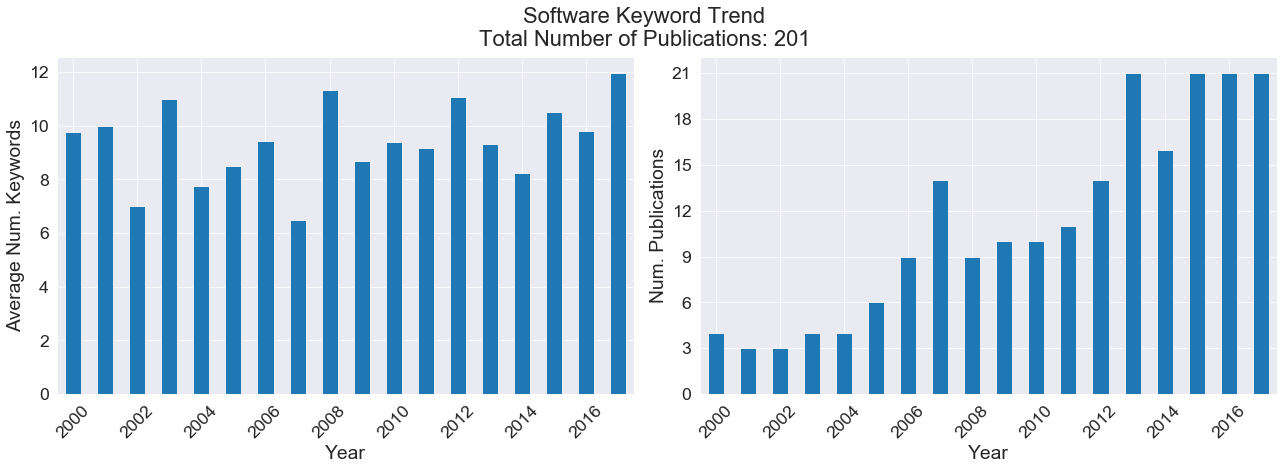

In [8]:
wos_plot.plot_kw_trend(software_rc, title='Software Keyword Trend', save_plot_fn='figs/software_kw_trend.png')

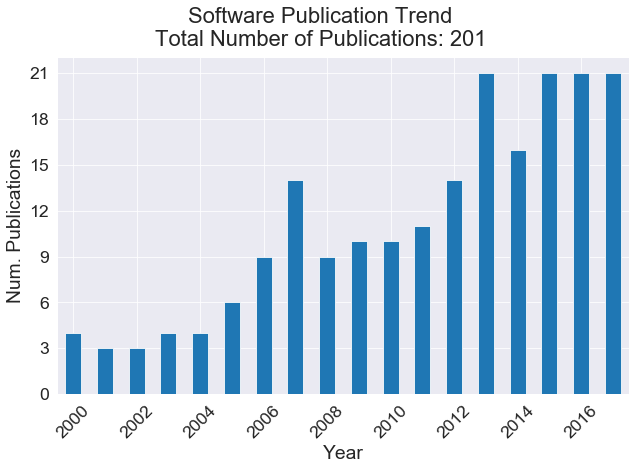

In [9]:
wos_plot.plot_pub_trend(software_rc, title='Software Publication Trend', save_plot_fn='figs/software_pub_trend.png')

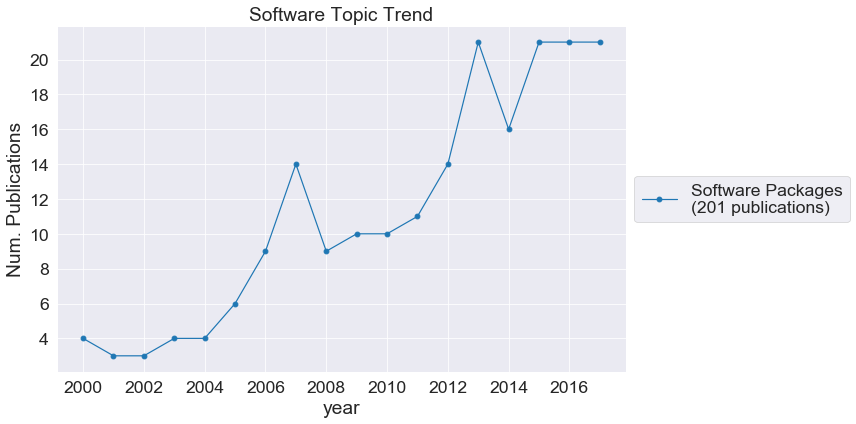

In [10]:
wos_plot.plot_topic_trend([software_rc], total_rc=False, title='Software Topic Trend', save_plot_fn='figs/software_topic_trend')

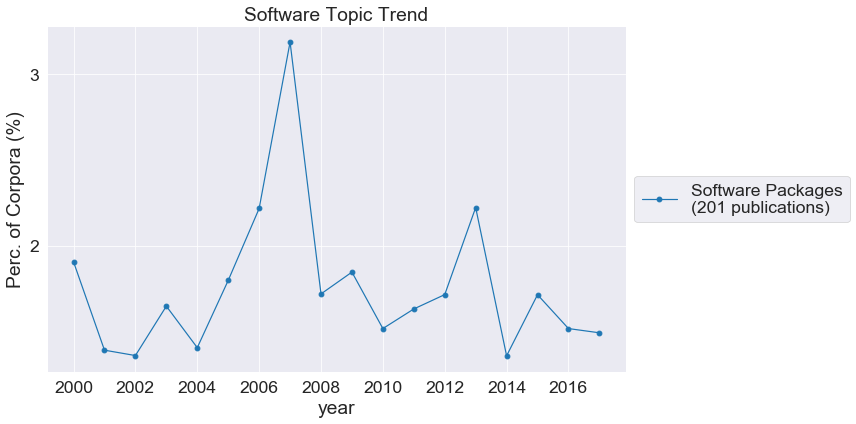

In [11]:
wos_plot.plot_topic_trend([software_rc], total_rc=RC, title='Software Topic Trend', save_plot_fn='figs/software_topic_trend')

Some ideas for further analysis: <br>
- Which fields are using which packages
- Trend of UA/SA/optimization
    - and which fields are using which methods
- Networkx diagrams

In [12]:
UA = wosis.keyword_matches(software_rc, ['uncertainty analysis', 'ua', 'uncertainty quantification'], threshold=95.0)

In [13]:
all_ua = UA.combine_recs()

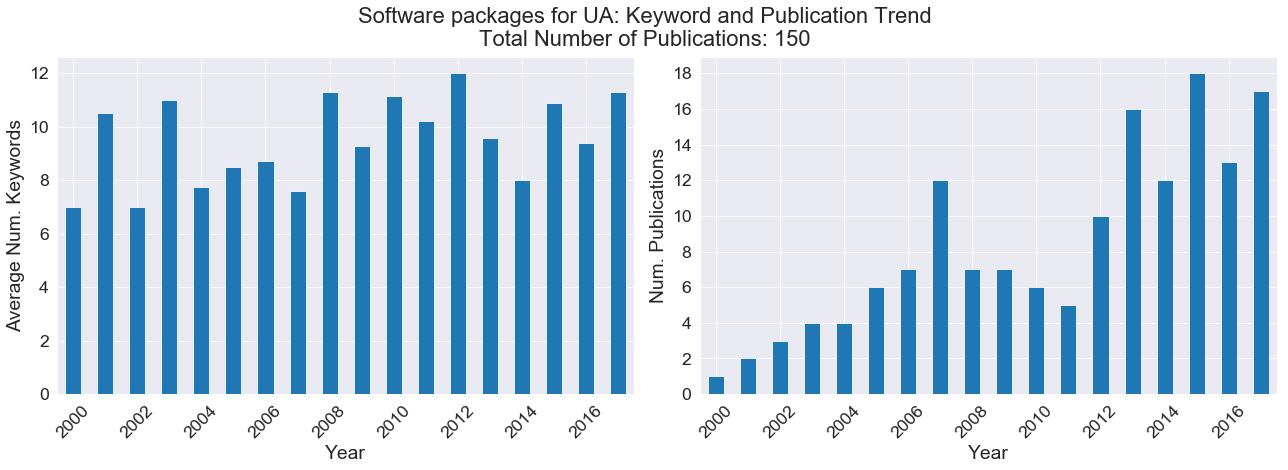

In [14]:
wos_plot.plot_kw_trend(all_ua, title='Software packages for UA: Keyword and Publication Trend', save_plot_fn='figs/ua_pub_trend.png')

In [15]:
SA = wosis.keyword_matches(software_rc, ['sensitivity analysis', 'sa'], threshold=95.0)

In [16]:
all_sa = SA.combine_recs()

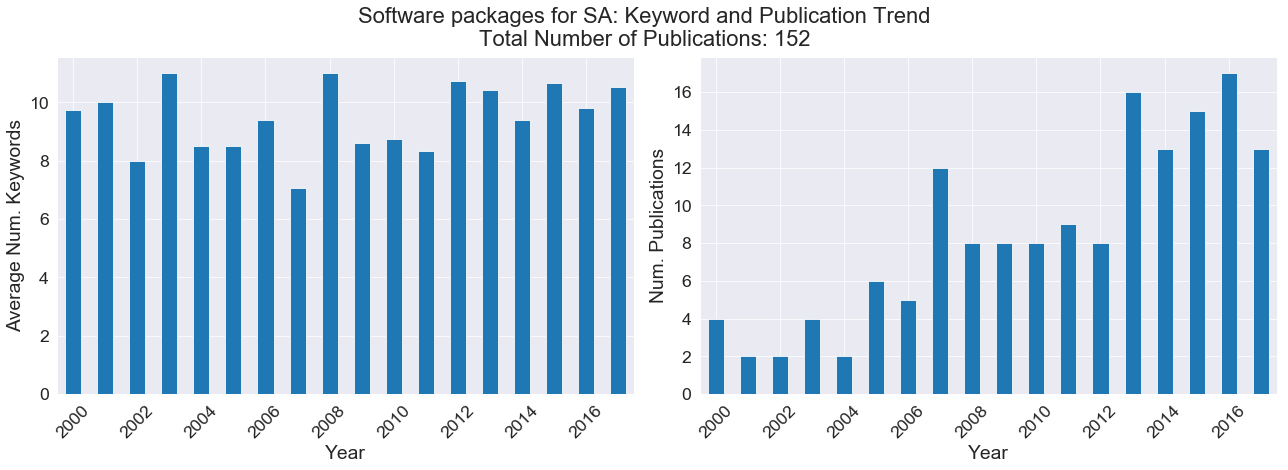

In [17]:
wos_plot.plot_kw_trend(all_sa, title='Software packages for SA: Keyword and Publication Trend', save_plot_fn='figs/sa_pub_trend.png')

In [18]:
optimization = wosis.keyword_matches(software_rc, ['optimization'], threshold=95.0)

In [19]:
all_optimization = optimization.combine_recs()

In [20]:
all_opt_df = wosis.rc_to_df(all_optimization)
all_opt_df.loc[all_opt_df['year'] == 2007, 'title'].tolist()

['Parallel computing techniques for sensitivity analysis in optimum structural design',
 'Parameter estimation and uncertainty analysis for a watershed model',
 'Application of non-linear automatic optimization techniques for calibration of HSPF',
 'Methods and object-oriented software for FE reliability and sensitivity analysis with application to a bridge structure',
 'Topology optimization of material-nonlinear continuum structures by the element connectivity parameterization',
 'Reliability-based multiobjective optimization for automotive crashworthiness and occupant safety']

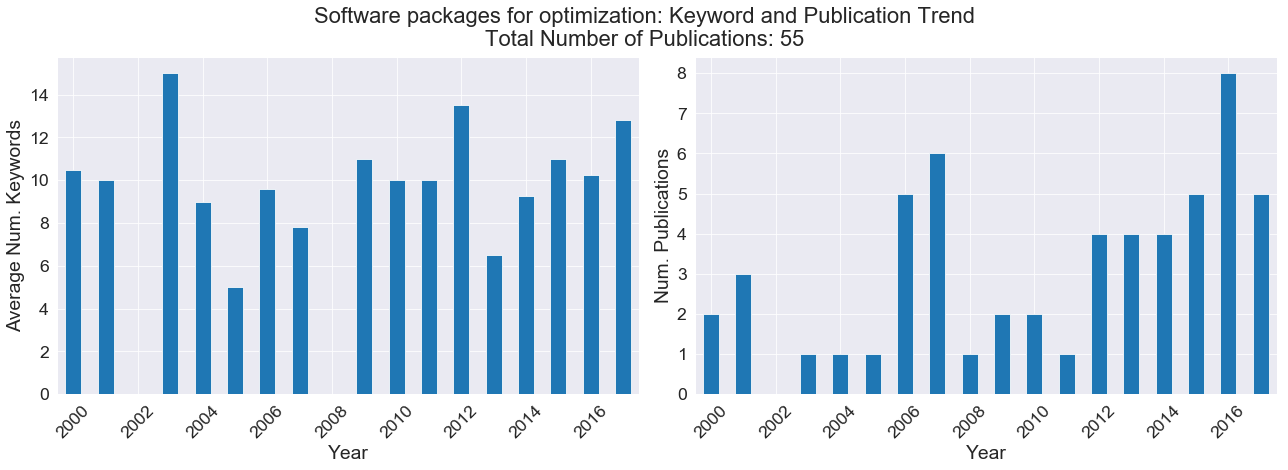

In [21]:
wos_plot.plot_kw_trend(all_optimization, title='Software packages for optimization: Keyword and Publication Trend', save_plot_fn='figs/opti_pub_trend.png')

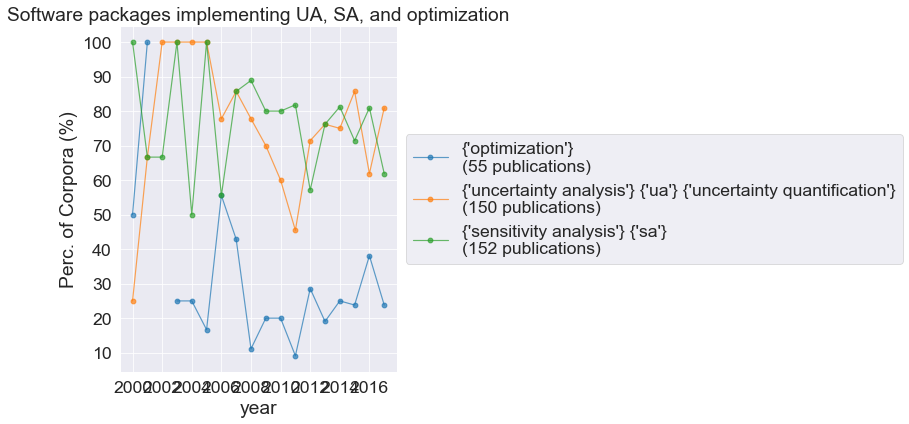

In [22]:
wos_plot.plot_topic_trend([all_optimization, all_ua, all_sa], total_rc=software_rc, title='Software packages implementing UA, SA, and optimization', save_plot_fn='figs/software_uasa_topics_keyword_trend_percentage.png')

<hr> Running a key-phrase extraction on UA/SA/optimization to identify the fields using this software.

In [54]:
ua_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_ua))

In [55]:
ua_phrases.display_phrases()

Sensitivity analysis of differential-algebraic equations and partial differential equations (2006) 
https://dx.doi.org/10.1016/j.compchemeng.2006.05.015 


Nitrous Oxide Emissions from Cropland: a Procedure for Calibrating the DayCent Biogeochemical Model Using Inverse Modelling (2013) 
https://dx.doi.org/10.1007/s11270-013-1677-z 

The aim of this study is to establish and demonstrate a procedure for calibration of DayCent to improve estimation of GHG emissions. 

Crop year  data were used for model calibration and  data were used for validation. 

The DayCent model was analysed and calibrated using NO flux data collected over  years at the Iowa State University Agronomy and Agricultural Engineering Research Farms, Boone, IA. 

After parameter estimation, the model underestimated the mean daily fluxes by  %. 

Sensitivity analysis performed provides important insights into the model structure providing guidance for model improvement. 


An environmental and economic analysis for geotu

The user can analyse different inhalation cases showing either that dose per unit intake cannot be applied if the aerosol contains a low number of particles or that an inhibition of the late pulmonary clearance by particle transport can occur which contributes to a - fold increase in effective dose as compared with application of default parameters. 


MULINO-DSS: a computer tool for sustainable use of water resources at the catchment scale (2004) 
https://dx.doi.org/10.1016/j.matcom.2003.07.003 

In mDSS integrated assessment modelling provides the values of quantitative indicators to be used for transparent and participated decisions, through the application of value functions, weights and decision rules chosen by the end user. 

The policy background refers to the EU Water Framework Directive. 


ASSESSMENT OF COLLOCATION AND GALERKIN APPROACHES TO LINEAR DIFFUSION EQUATIONS WITH RANDOM DATA (2011) 
https://dx.doi.org/10.1615/Int.J.UncertaintyQuantification.v1.i1.20 

We compare the

In-depth study of the published models reveals a clear evolution over time in the concept of modelling, from just hydraulic empirical models to D ones and from simple first-order water quality models to complex ones which describe key biochemical processes as a set of mathematical equations. 


Scales and similarities in runoff processes with respect to geomorphometry (2000) 
https://dx.doi.org/10.1002/1099-1085(20000815/30)14:11/12<1963::AID-HYP48>3.0.CO;2-M 

Therefore, geomorphometric classifications of catchment types could form a basis for representative hydrological modelling at the large scale. 

Models describing soil distribution in relation to geomorphometry could assist regionalization of spatial heterogeneity and structure of soil parameters relevant in hydrological modelling. 

Hydrological models (SAKE and TOPMODEL) were then used to simulate rainfall-runoff processes, and finally statistical tools and sensitivity analysis were applied to gain an insight into the hydrolog

A standard interface between simulation programs and systems analysis software (2006) 
https://dx.doi.org/10.2166/wst.2006.029 

This interface is designed to facilitate linkage of environmental simulation programs with systems analytical software and thus can contribute to remedying the deficiency in applying systems analytical techniques to environmental modelling studies. 

It is open for implementation by academic and commercial simulation and systems analytical software developers and is very simple to implement. 

Furthermore, such a development could stimulate the transfer of systems analytical techniques between different fields of application. 

A simple interface between simulation programs and systems analytical software is proposed. 

The proposed concept, consisting of a text file interface combined with a batch mode simulation program call, is independent of model structure, operating system and programming language. 


Development of a Long-term, Ecologically Oriented Da

Moreover, the Arrhenius constant was the only parameter sensitive to model performances of ON-N and NH-N simulations. 


A user-friendly software package for VIC hydrologic model development (2017) 
https://dx.doi.org/10.1016/j.envsoft.2017.09.006 

VIC-ASSIST enables users to navigate the model building process through prompts and automation, with the intention to promote the use of the model for practical, educational, and research purposes. 

The automated processes include watershed delineation, climate and geographical input set-up, model parameter calibration, sensitivity analysis, and graphical output generation. 


Pi 4U: A high performance computing framework for Bayesian uncertainty quantification of complex models (2015) 
https://dx.doi.org/10.1016/j.jcp.2014.12.006 

The optimization tasks associated with the asymptotic approximations are treated via the Covariance Matrix Adaptation Evolution Strategy (CMA-ES). 

The framework accommodates scheduling of multiple physical mo

For a sensitivity analysis of the overall LCA results, the so-called CML method is used in order to estimate the influence of the choice of the assessment method on the result Life cycle inventory information is complied by ecoinvent . 

Associated with the tremendous prosperity in world electronic information and telecommunication industry, there continues to be an increasing awareness of the environmental impacts related to the accelerating mass production, electricity use, and waste management of electronic and electric products (e-products). 


Integration of a Three-Dimensional Process-Based Hydrological Model into the Object Modeling System (2016) 
https://dx.doi.org/10.3390/w8010012 

The integration of a spatial process model into an environmental modeling framework can enhance the model's capabilities. 

This study serves as a template for future integration of process models into OMS. 

Executing GEOtop as an OMS model component allows it to: () interact directly with the ope

The hydrological model parameters had less impact on the reliability of the modelling results. 

The impact of model parameters on the runoff modelling results was estimated using a sensitivity analysis for the selected hydrological periods (spring flood, winter and autumn flash floods, and low water). 

The uncertainties introduced by hydrological model parameters, emission scenarios and global climate models were presented according to the magnitude of the expected changes in Lithuanian rivers runoff. 


Passive Optimization Design Based on Particle Swarm Optimization in Rural Buildings of the Hot Summer and Warm Winter Zone of China (2017) 
https://dx.doi.org/10.3390/su9122288 

Taking Quanzhou (Fujian Province of China) as an example, based on the field investigation, EnergyPlus is used to build the building performance model. 

Single-objective optimization has provided guidance to the multi-dimensional optimization and regression analysis is used to find the effects of a single i

Genetic algorithm-based multiobjective optimization software GDOT, developed in-house, is used to come up with an optimal pareto front in all cases. 

The optimal solution indicated by knee point on the optimal pareto front is verified with LS-DYNA simulation results. 

It shows that the vehicle weight can be reduced significantly from the baseline design and at the same time reduce the door velocity. 

The technique employed in this study treats multiple objective functions separately without combining them in any form. 

Uncertainty quantification is performed using two first order reliability method-based techniques: approximate moment approach and reliability index approach. 


Methods for assessing uncertainty in fundamental assumptions and associated models for cancer risk assessment (2008) 
https://dx.doi.org/10.1111/j.1539-6924.2008.01134.x 

The distributional approach for uncertainty analysis in cancer risk assessment is reviewed and extended. 

Alternative software platforms

In [56]:
sa_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_sa))

In [57]:
sa_phrases.display_phrases()

Sensitivity analysis of differential-algebraic equations and partial differential equations (2006) 
https://dx.doi.org/10.1016/j.compchemeng.2006.05.015 


Nitrous Oxide Emissions from Cropland: a Procedure for Calibrating the DayCent Biogeochemical Model Using Inverse Modelling (2013) 
https://dx.doi.org/10.1007/s11270-013-1677-z 

The aim of this study is to establish and demonstrate a procedure for calibration of DayCent to improve estimation of GHG emissions. 

Crop year  data were used for model calibration and  data were used for validation. 

The DayCent model was analysed and calibrated using NO flux data collected over  years at the Iowa State University Agronomy and Agricultural Engineering Research Farms, Boone, IA. 

After parameter estimation, the model underestimated the mean daily fluxes by  %. 

Sensitivity analysis performed provides important insights into the model structure providing guidance for model improvement. 


An environmental and economic analysis for geotu

In addition to feedback on the prototypes, several themes and issues emerged that are as compelling as the original goal and will eventually serve as a starting point for further development of visualization and analysis tools. 

In this paper we present the results from a series of focus groups on the visualization of uncertainty in equation-of-state (EOS) models. 

An effective software tool for this community must be cognizant of this workflow and alleviate the bottlenecks and barriers within it. 

The initial goal was to identify the most effective ways to present EOS uncertainty to analysts, code developers, and material modelers. 

Material model stakeholders contribute and extract information at different points in this workflow depending on their role, but encounter various institutional and technical barriers which restrict the flow of information. 


The Effect of Vitamin A on Fracture Risk: A Meta-Analysis of Cohort Studies (2017) 
https://dx.doi.org/10.3390/ijerph14091043 


Hydrological models (SAKE and TOPMODEL) were then used to simulate rainfall-runoff processes, and finally statistical tools and sensitivity analysis were applied to gain an insight into the hydrological significance of the various geomorphometric properties. 

In this study several computer techniques and models were applied to investigate the effects of geomorphometry on rainfall-runoff processes at different scales. 

Spatial distributions of soil types are partly related to morphometry and can be captured using soil-morphometry models. 


Finite element response sensitivity analysis of multi-yield-surface J(2) plasticity model by direct differentiation method (2009) 
https://dx.doi.org/10.1016/j.cma.2009.02.030 

This algorithm is implemented in a general-purpose nonlinear finite element analysis program. 

The normalized response sensitivity analysis results are then used to measure the relative importance of the soil constitutive parameters on the system response. 

The complete d

https://dx.doi.org/10.1007/s12665-013-2283-5 

To facilitate water resources and environmental management, an ArcGIS-Based Nitrate Load Estimation Toolkit (ArcNLET) is developed to simulate nitrate transport and estimate nitrate load from septic systems and collocated fertilizer applications in groundwater to surface water bodies. 

A global sensitivity analysis is performed to identify critical parameters for model calibration, and the most critical parameter is the first-order decay coefficient used to simulate the denitrification process. 

Estimated nitrate loads exhibit spatial variability, which is useful to facilitate decisions on the conversion of OSTDS into sewers in certain areas for reducing nitrate load from septic systems to surface water bodies. 


Parameterization based shape optimization: theory and practical implementation aspects (2005) 
https://dx.doi.org/10.1108/02644400510603041 

Findings - The proposed approach offers an unified approach to shape optimization of 

In general, in order to maximize resource recovery, a low power density, thus a low membrane productivity, must be accepted. 


Sensitivity Analysis of Multiple Informant Models When Data Are Not Missing at Random (2013) 
https://dx.doi.org/10.1080/10705511.2013.769393 

Statistical inference is based on the assumption that data are missing completely at random or missing at random. 

Importantly, whether or not data are missing is assumed to be independent of the missing data. 

Missing data are common in studies that rely on multiple informant data to evaluate relationships among variables for distinguishable individuals clustered within groups. 

Estimation of structural equation models using raw data allows for incomplete data, and so all groups can be retained for analysis even if only  member of a group contributes data. 


Soil solution concentrations and chemical species of copper and zinc in a soil with a history of pig slurry application and plant cultivation (2016) 
https://

The adjoint modeling is presented as an efficient tool to evaluate the sensitivity of a scalar response function with respect to the initial conditions and model parameters. 

In addition, sensitivity with respect to time-dependent model parameters may be obtained through a single backward integration of the adjoint model. 

In a companion paper, we present an extensive set of numerical experiments that validate the KPP software tools for several direct/adjoint sensitivity applications, and demonstrate the efficiency of KPP-generated sensitivity code implementations. 

In this work, we extend the direct-decoupled approach to Rosenbrock stiff integration methods. 


Operational snow mapping with simplified data assimilation using the seNorge snow model (2016) 
https://dx.doi.org/10.1016/j.jhydrol.2016.03.061 

In this paper the revised seNorge snow model (v...) for snow mapping is described, and a simplified data assimilation procedure is introduced to correct detected snow model biases

The optimization can be used to guide the design of new rural construction in the area and the energy saving transformation of the existing rural houses, which can help to achieve the purpose of energy saving and comfort. 

Results shows that the energy saving rate of an optimized rural residence is about -% corresponding to the existing rural residence. 

Energy conservation and energy utilization are important for the green building evaluation criteria (GBEC). 


NCNA: Integrated platform for constructing, visualizing, analyzing and sharing human-mediated nitrogen biogeochemical networks (2011) 
https://dx.doi.org/10.1016/j.envsoft.2010.11.002 

Human alterations to the nitrogen (N) cycle are closely associated with global environmental and climate change. 

New tools are necessary to model and analyze the highly complex N cycles emerging from human-mediated ecosystems. 

We developed a new software. 


Structural design optimization on thermally induced vibration (2003) 
https://dx.

Evolutionary topology optimization of periodic composites for extremal magnetic permeability and electrical permittivity (2012) 
https://dx.doi.org/10.1007/s00158-012-0766-8 

The proposed BESO method can be implemented easily as a post-processor to standard commercial finite element analysis software packages, e.g. 

The proposed BESO algorithm is computationally efficient as the solution usually converges in less than  iterations. 

Numerical examples demonstrate that the electromagnetic properties of the resulting D and D microstructures are very close to the theoretical Hashin-Shtrikman (HS) bounds. 

ANSYS which has been used in this study. 


Parameter estimation and uncertainty analysis for a watershed model (2007) 
https://dx.doi.org/10.1016/j.envsoft.2006.06.007 

This paper explores the use of three such methods, and compares their performance when used in conjunction with a lumped parameter model for surface water flow (HSPF) in a large watershed. 

As well as this, they can

In [58]:
opt_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_optimization))

In [59]:
opt_phrases.display_phrases()

Sensitivity analysis of differential-algebraic equations and partial differential equations (2006) 
https://dx.doi.org/10.1016/j.compchemeng.2006.05.015 


Nitrous Oxide Emissions from Cropland: a Procedure for Calibrating the DayCent Biogeochemical Model Using Inverse Modelling (2013) 
https://dx.doi.org/10.1007/s11270-013-1677-z 

The aim of this study is to establish and demonstrate a procedure for calibration of DayCent to improve estimation of GHG emissions. 

Crop year  data were used for model calibration and  data were used for validation. 

The DayCent model was analysed and calibrated using NO flux data collected over  years at the Iowa State University Agronomy and Agricultural Engineering Research Farms, Boone, IA. 

After parameter estimation, the model underestimated the mean daily fluxes by  %. 

Sensitivity analysis performed provides important insights into the model structure providing guidance for model improvement. 


COOPT - a software package for optimal control o

Results show that the DETRANSPFE model outperforms the GA- and HS-based models in terms of the network performance index and the computational time required. 

In this model, the TRANSYT traffic simulation software is combined with Differential Evolution (DE) optimization algorithm, which is based on the natural selection paradigm. 

The solution of the bilevel EQND problem is carried out by the proposed Differential Evolution and TRANSYT with PFE, the so-called DETRANSPFE model, on a well-known signal controlled test network. 


Multi-objective model auto-calibration and reduced parameterization: Exploiting gradient-based optimization tool for a hydrologic model (2015) 
https://dx.doi.org/10.1016/j.envsoft.2015.04.001 

Two sets of roughness coefficients for main channels, one assigned and calibrated according on soil types and one determined via empirical equations, were examined for stream discharge simulation. 

The time-series processor TSPROC was used to combine multiple objectiv

Also analyzed is the spectrum of the Hessian of the objective. 

Classsical MDS assumes a fixed matrix of dissimilarities. 


A toolbox using the stochastic optimization algorithm MIPT and ChemCAD for the systematic process retrofit of complex chemical processes (2016) 
https://dx.doi.org/10.1016/j.compchemeng.2015.08.023 

An optimization framework for the purpose of retrofitting using a rigorous process simulation tool is proposed to fulfill this task. 

The results of a sensitivity analysis and the optimization for different feed compositions are presented. 

The toolbox provides a quick evaluation of the process by searching for the global optimum. 

The usage of a rigorous process simulator is providing a high accuracy of the thermodynamic results which is necessary to evaluate the influence of the new process design. 

To simplify the user input a graphical user interface was programmed. 


Interactive software for material parameter characterization of advanced engineering const

<hr> Top-cited journals for UA/SA/optimization
<br> - Original intention was to find top cited for each three collections, but there was significant overlap, so just ran the analysis on the entire refined_software collection

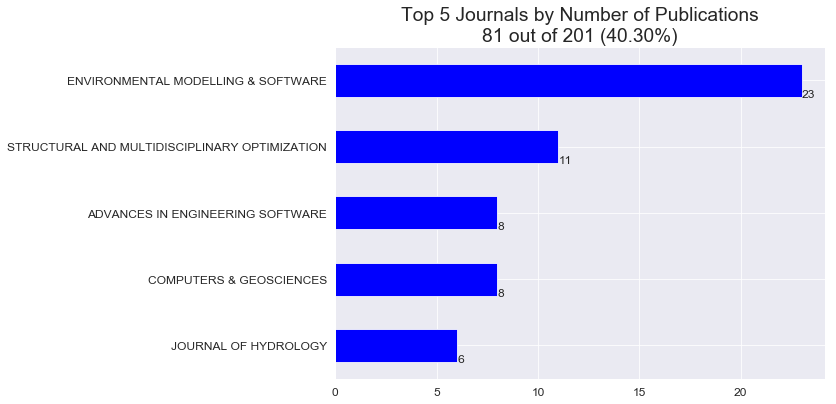

In [76]:
wos_plot.plot_pubs_per_journal(software_rc, top_n=5, annotate=True, show_stats=True, save_plot_fn='figs/software2_journal_pubs.png')

In [77]:
journals_of_interest_software = ['Environmental Modelling & Software'.upper(), 'Journal of Hydrology'.upper(), 'Computers & Geosciences'.upper(), 'Structural and Multidisciplinary Optimization'.upper(), 'Advances in Engineering Software'.upper()]
pubs_for_journals_software = wosis.find_pubs_by_journal(software_rc, journals_of_interest_software)

In [78]:
data_dir = "tmp"  # Using the temporary data directory 
                    #- should this be a different tmp?

# Get citations for each paper
paper_citations_per_journal_software = {}
for pubs in pubs_for_journals_software:
    paper_citations_per_journal_software[pubs] = wosis.get_num_citations(pubs_for_journals_software[pubs], wos_config, 
                                                                    cache_dir=data_dir)

Authenticated (SID: 7EY9lFgvVS62zMt6ipn)



Authenticated (SID: 6B7JWOgCmTsQTXnrgvU)



Authenticated (SID: 8BBWxMoZz5s8qIrhNTh)



Authenticated (SID: 5EHe6mJS4nd3yC4w8Md)



Authenticated (SID: 8FYdtb1D9qKQhZIJray)


In [80]:
cols_of_interest = ['AU', 'year', 'title', 'journal', 'citations', 'DOI link']
collection_software = pd.DataFrame(columns=cols_of_interest)
for journal_name, df in paper_citations_per_journal_software.items():
    df = wosis.link_to_pub(df)
    df['journal'] = journal_name
    df['DOI link'] = df['DOI link'].str.replace('envost', 'envsoft')  # fix incorrect DOI link
    df = df.sort_values('citations', ascending=False)
    collection_software = collection_software.append(df[cols_of_interest][0:10], ignore_index=True)

In [81]:
top_cited_in_top_journals_software = collection_software.sort_values('citations', ascending=False)
top_cited_in_top_journals_software.head(10)

,AU,year,title,journal,citations,DOI link
16,"Ziehn, T|Tomlin, AS",2009,GUI-HDMR - A software tool for global sensitiv...,ENVIRONMENTAL MODELLING & SOFTWARE,120,https://dx.doi.org/10.1016/j.envsoft.2008.12.002
17,"Gallagher, M|Doherty, J",2007,Parameter estimation and uncertainty analysis ...,ENVIRONMENTAL MODELLING & SOFTWARE,118,https://dx.doi.org/10.1016/j.envsoft.2006.06.007
18,"Clavreul, J|Baumeister, H|Christensen, TH|Damg...",2014,An environmental assessment system for environ...,ENVIRONMENTAL MODELLING & SOFTWARE,77,https://dx.doi.org/10.1016/j.envsoft.2014.06.007
19,"Gan, YJ|Duan, QY|Gong, W|Tong, C|Sun, YW|Chu, ...",2014,A comprehensive evaluation of various sensitiv...,ENVIRONMENTAL MODELLING & SOFTWARE,72,https://dx.doi.org/10.1016/j.envsoft.2013.09.031
26,"Cannavo, F",2012,Sensitivity analysis for volcanic source model...,COMPUTERS & GEOSCIENCES,71,https://dx.doi.org/10.1016/j.cageo.2012.03.008
20,"Harmel, RD|Smith, DR|King, KW|Slade, RM",2009,Estimating storm discharge and water quality d...,ENVIRONMENTAL MODELLING & SOFTWARE,64,https://dx.doi.org/10.1016/j.envsoft.2008.12.006
21,"Wegmann, F|Cavin, L|MacLeod, M|Scheringer, M|H...",2009,The OECD software tool for screening chemicals...,ENVIRONMENTAL MODELLING & SOFTWARE,60,https://dx.doi.org/10.1016/j.envsoft.2008.06.014
6,"Sinha, K",2007,Reliability-based multiobjective optimization ...,STRUCTURAL AND MULTIDISCIPLINARY OPTIMIZATION,58,https://dx.doi.org/10.1007/s00158-006-0050-x
0,"Shin, MJ|Guillaume, JHA|Croke, BFW|Jakeman, AJ",2013,Addressing ten questions about conceptual rain...,JOURNAL OF HYDROLOGY,56,https://dx.doi.org/10.1016/j.jhydrol.2013.08.047
27,"Brown, JD|Heuvelink, GBM",2007,The Data Uncertainty Engine (DUE): A software ...,COMPUTERS & GEOSCIENCES,51,https://dx.doi.org/10.1016/j.cageo.2006.06.015


In [82]:
top_cited_in_top_journals_software.to_csv('../data/top_cited_software_papers.csv')

<hr> Searching a criteria match for areas which are applying these software packages, then using key-phrase extraction to identify whether the packages are being used for UA, SA, or optimization.

In [39]:
criteria = {
    'policy': set(['policy', 'adapt', 'decision support', 'management', 'gis']),
    'agri': set(['agricultur', 'farm']),
    'water': set(['hydrology', 'water', 'stream', 'aquifer']),
    'enviro': set(['environment', 'climate', 'ecology', 'ecosystem', 'biodivers', 'conservation']),
    'socio_economic': set(['ecosystem service', 'social', 'conflict', 'particip', 'law', 'stakehold', 'policy', 'economic']),
    'risk': set(['risk', 'risk management', 'hazard', 'control']),
    'medicine': set(['infection', 'disease', 'injury', 'medicine', 'cancer', 'treatment', 'health']),
    'chemistry': set(['chem', 'reaction', 'catalyst', 'isotope'])
}

crit_matches = wosis.keyword_matches_by_criteria(software_rc, criteria, threshold=95.0)

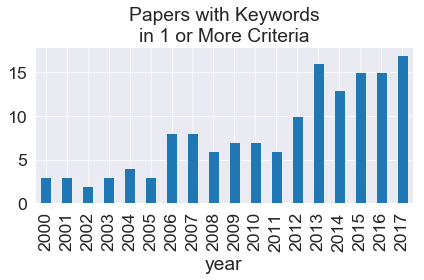

In [41]:
criteria_df = wosis.collate_keyword_criteria_matches(software_rc, crit_matches)
wos_plot.plot_criteria_trend(criteria_df, threshold=1)

In [42]:
policy = wosis.keyword_matches(software_rc, ['policy', 'adapt', 'decision support', 'management', 'gis'], threshold=95.0)

In [43]:
all_policy = policy.combine_recs()

In [44]:
policy_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_policy))

In [45]:
policy_phrases.display_phrases()

Investigating uncertainty and sensitivity in integrated, multimedia environmental models: tools for FRAMES-3MRA (2005) 
https://dx.doi.org/10.1016/j.envsoft.2004.09.013 

seconds/simulation, a relative cost increase of .% over average model runtime. 

The MRA modeling system includes a set of  science modules that collectively simulate release, fate and transport, exposure, and risk associated with hazardous contaminants disposed of in land-based waste management units (WMU). 

Developed for MRA and extendable to other computer models, an accompanying platform-independent, Java-based parallel processing software toolset is also discussed. 

For MRA, comparison of stand-alone PC versus SuperMUSE simulation executions showed a parallel computing overhead of only . 

The Framework for Risk Analysis in Multimedia Environmental Systems - Multimedia, Multipathway, and Multireceptor Risk Assessment (FRAMES-MRA) is an important software model being developed by the United States Environmental 

Parallel computing techniques for sensitivity analysis in optimum structural design (2007) 
https://dx.doi.org/10.1016/(ASCE)0887-3801(2007)21:6(463) 

single-level and multilevel parallelisms are pursued for design sensitivities. 

The parallel algorithms for design sensitivity analysis have been implemented on message passing parallel systems within the software platform of Parallel Computer Adaptive Language. 

Numerical studies show that the performance of the parallel algorithms for design sensitivities on message passing systems is very good. 


The rocky road to extended simulation frameworks covering uncertainty, inversion, optimization and control (2017) 
https://dx.doi.org/10.1016/j.envsoft.2016.10.003 

While there is an ongoing discussion on quality assurance and reproducibility for simulation frameworks, we have not observed a similar discussion for the extended case. 

Recently, the combination with tools for uncertainty quantification, inverse modelling, optimization and

Water quality Risk Analysis Tool (WaterRAT) is software for supporting decision-making in surface water quality management. 

Using sensitivity and uncertainty analyses based on Monte Carlo simulation and first order methods, WaterRAT allows the modeller to identify the significant uncertainties, and evaluate the degree to which they control decision-making risk. 


Optimal control of open-channel flow using adjoint sensitivity analysis (2006) 
https://dx.doi.org/10.1061/(ASCE)0733-9429(2006)132:11(1215) 

This new optimal flow control model can be generally applied to make optimal decisions in real-time flood control and water resource management in a watershed. 

The internal boundary conditions of the adjoint equations at a confluence (junction) derived by the variational approach make the flow control model applicable to solve optimal flow control problems in a channel network over a watershed. 


Enhancing the Characterization of Epistemic Uncertainties in PM2.5 Risk Analyses (201

In [46]:
agri = wosis.keyword_matches(software_rc, ['agricultur', 'farm'], threshold=95.0)

In [47]:
all_agri = agri.combine_recs()

In [48]:
agri_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_agri))

In [49]:
agri_phrases.display_phrases()

Nitrous Oxide Emissions from Cropland: a Procedure for Calibrating the DayCent Biogeochemical Model Using Inverse Modelling (2013) 
https://dx.doi.org/10.1007/s11270-013-1677-z 

The aim of this study is to establish and demonstrate a procedure for calibration of DayCent to improve estimation of GHG emissions. 

Crop year  data were used for model calibration and  data were used for validation. 

The DayCent model was analysed and calibrated using NO flux data collected over  years at the Iowa State University Agronomy and Agricultural Engineering Research Farms, Boone, IA. 

After parameter estimation, the model underestimated the mean daily fluxes by  %. 

Sensitivity analysis performed provides important insights into the model structure providing guidance for model improvement. 


Integration of a Three-Dimensional Process-Based Hydrological Model into the Object Modeling System (2016) 
https://dx.doi.org/10.3390/w8010012 

The integration of a spatial process model into an environ

In [50]:
water = wosis.keyword_matches(software_rc, ['hydrology', 'water', 'stream', 'aquifer'], threshold=95.0)

In [51]:
all_water = water.combine_recs()

In [52]:
water_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_water))

In [53]:
water_phrases.display_phrases()

Designing and implementing a multi-core capable integrated urban drainage modelling Toolkit:Lessons from CityDrain3 (2016) 
https://dx.doi.org/10.1016/j.advengsoft.2016.08.004 

Integrated urban drainage modelling combines different aspects of the urban water system into a common framework. 

The performance advantage of parallelization (up to  times compared to its predecessor) and the scalability of the framework are also demonstrated. 

The design and implementation of the integrated modelling framework CityDrain shows that it is possible to write research code that is high-performance and extensible by many research projects. 

With advancements in modern information technology, a parallel implementation of such a modelling toolkit is mandatory while still leaving its users the flexibility of extensions. 

With increasing pressures of a changing climate, urban growth and economic constraints, the need for wider spread integration is necessary in the interest of a sustainable future

The analysis documented that the uncertainty on the conceptual geological model was as significant as the uncertainty related to the embedded hydraulic parameters. 

Recent developments in theoretical methods for quantifying geological uncertainty have made it possible to consider this factor in groundwater modeling. 


River-to-sea pressure retarded osmosis: Resource utilization in a full-scale facility (2016) 
https://dx.doi.org/10.1016/j.desal.2016.01.012 

Furthermore, a sensitivity analysis was performed to elucidate the relationship between net specific energy and power density as functions of membrane area, flow rates, and operating pressures. 

This source of renewable energy is sizeable and in the past decade several investigations analyzed its potential. 

In this article, the net specific energy production from a facility-scale PRO system was determined and optimized by using a novel simulation method that integrates parasitic loads and efficiencies of the PRO facility compo

We developed interactive interfaces so that the optimization processes are transparent. 


An environmental and economic analysis for geotube coastal structures retaining dredge material (2012) 
https://dx.doi.org/10.1016/j.resconrec.2012.01.011 

() on the economic aspects of geotube technology and identifies the optimum method of construction for each type of coastal structure. 

In general, the larger the scale of the project the greater the potential savings in CO emissions and cost that can be achieved through the use of geotube technology. 

The analyses highlight that the size of the structure and the distance to the source of the quarry material are crucial factors in determining the optimum construction method. 

This paper investigates the environmental and economic sensitivity of coastal structures for two different construction methods: a traditional rubble mound structure and a geotube coastal structure using dredged material. 

The key logistical parameters are analysed t

Identification of Critical Erosion Watersheds for Control Management in Data Scarce Condition Using the SWAT Model (2015) 
https://dx.doi.org/10.1061/(ASCE)HE.1943-5584.0001093 

Out of these  watersheds, erosion classes of  exactly matched with the manually described erosion class. 

Identification of critical watersheds prone to soil erosion has been performed by using a hydrological model in data scarce Damodar River catchment, located in Jharkhand state of India. 

and .-., for both the watersheds during calibration and validation period. 

Model was successfully used for prioritization of  watersheds delineated using the computer software model within the catchment. 

Calibration and validation results revealed that model is predicting monthly runoff and sediment yield satisfactory for the two watersheds of the Damodar River catchment. 


Multisite Assessment of Hydrologic Processes in Snow-Dominated Mountainous River Basins in Colorado Using a Watershed Model (2015) 
https://dx.d

In [54]:
enviro = wosis.keyword_matches(software_rc, ['environment', 'climate', 'ecology', 'ecosystem', 'biodivers', 'conservation'], threshold=95.0)

In [55]:
all_enviro = enviro.combine_recs()

In [56]:
enviro_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_enviro))

In [57]:
enviro_phrases.display_phrases()

On ISSM and leveraging the Cloud towards faster quantification of the uncertainty in ice-sheet mass balance projections (2016) 
https://dx.doi.org/10.1016/j.cageo.2016.08.007 

We show how errors in the projections were accurately quantified using Monte-Carlo sampling analysis on the EC Cloud, and how a judicious mix of high-end parallel computing and Cloud use can best leverage existing infrastructures, and significantly accelerate delivery of potentially ground-breaking climate projections, and in particular, enable uncertainty quantification that were previously impossible to achieve. 

We demonstrate how this approach was used to carry out an extensive analysis of ice-flow projections on one of the largest basins in Greenland, the North-East Greenland Glacier, using the Ice Sheet System Model, the public-domain NASA-funded ice-flow modeling software. 

Among specific applications of this new paradigm, we show here how uncertainty quantification in climate projections of polar ice s

https://dx.doi.org/10.1016/j.scitotenv.2015.01.112 

The use group of lifecycle stages for the dispenser product system, which represents the cradle to gate lifecycle stages associated with the paper towels, constitutes the major portion of this impact. 

An uncertainty analysis addressing key input data and assumptions made, a sensitivity analysis covering the use intensity of the product systems and a scenario analysis looking at a US based use phase for the hand dryer were also conducted. 

It is evident from the results of this study that per dry, for a use phase supplied by Ontario's grid ( grid mix scenario) and a United States based manufacturing scenario, the use of a conventional hand dryer (rated at  W and under a  s use intensity) has a lesser environmental impact than with using two paper towels (% recycled content, unbleached and weighing  g) issued from a roll dispenser. 

The Impact + method was used for classification and characterization of these environmental impacts.

This paper investigates the environmental and economic sensitivity of coastal structures for two different construction methods: a traditional rubble mound structure and a geotube coastal structure using dredged material. 

The key logistical parameters are analysed to generate environmental and economic ranking tables. 


Parameter sensitivity analysis and optimization of Noah land surface model with field measurements from Huaihe River Basin, China (2015) 
https://dx.doi.org/10.1007/s00477-015-1033-5 

This study aims to identify the parameters that are most important in controlling the Noah land surface model (LSM), the analysis of parameter interactions, and the evaluation of the performance of parameter optimization using the parameter estimation software PEST. 

To our knowledge, this parameter interaction in the Noah LSM has never been studied before. 

According to the sensitivity analysis results, four sensitive parameters were chosen to be optimized using the PEST method. 

T

This study evaluated the effect of temporal and spatial rainfall resolution on the predictive performance of Hydrological Simulation Program-Fortran (HSPF) using manual and automatic calibration procedures. 

Furthermore, the effect of automatic parameter estimation on the physical significance of calibrated parameter values was evaluated. 

when individual rain gauges (RG, RG, RG, and RG) were used one at a time. 

Model efficiency improved and ranged from . 


Estimation of nitrate load from septic systems to surface water bodies using an ArcGIS-based software (2013) 
https://dx.doi.org/10.1007/s12665-013-2283-5 

To facilitate water resources and environmental management, an ArcGIS-Based Nitrate Load Estimation Toolkit (ArcNLET) is developed to simulate nitrate transport and estimate nitrate load from septic systems and collocated fertilizer applications in groundwater to surface water bodies. 

A global sensitivity analysis is performed to identify critical parameters for model cal

In [58]:
socio_ec = wosis.keyword_matches(software_rc, ['ecosystem service', 'social', 'conflict', 'particip', 'law', 'stakehold', 'policy', 'economic'], threshold=95.0)

In [59]:
all_socio_ec = socio_ec.combine_recs()

In [60]:
socio_ec_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_socio_ec))

In [61]:
socio_ec_phrases.display_phrases()

Techno-economic analysis of two bio-oil upgrading pathways (2013) 
https://dx.doi.org/10.1016/j.cej.2013.01.030 

The primary products of the hydrotreating/FCC pathway are commodity chemicals whereas the primary products for the hydrotreating/hydrocracking pathway are transportation fuels and hydrogen. 

In the hydrotreating/FCC pathway, two options are available as the hydrogen source for hydrotreating: merchant hydrogen or hydrogen from natural gas reforming. 

The results show that a facility employing the hydrotreating/ FCC pathway with hydrogen production via natural gas reforming option generates the highest IRR of .%. 

We evaluate the economic feasibility for two bio-oil upgrading pathways: two-stage hydrotreating followed by fluid catalytic cracking (FCC) or single-stage hydrotreating followed by hydrocracking. 

The bio-oil yield via fast pyrolysis is assumed to be % of biomass. 


Determination of the optimal installation capacity of small hydro-power plants through the use 

In mDSS integrated assessment modelling provides the values of quantitative indicators to be used for transparent and participated decisions, through the application of value functions, weights and decision rules chosen by the end user. 

The policy background refers to the EU Water Framework Directive. 




In [74]:
med = wosis.keyword_matches(software_rc, ['infection', 'disease', 'injury', 'medicine', 'cancer', 'treatment', 'health'], threshold=95.0)

In [75]:
all_med = med.combine_recs()

In [76]:
med_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_med))

In [77]:
med_phrases.display_phrases()

Investigating uncertainty and sensitivity in integrated, multimedia environmental models: tools for FRAMES-3MRA (2005) 
https://dx.doi.org/10.1016/j.envsoft.2004.09.013 

seconds/simulation, a relative cost increase of .% over average model runtime. 

The MRA modeling system includes a set of  science modules that collectively simulate release, fate and transport, exposure, and risk associated with hazardous contaminants disposed of in land-based waste management units (WMU). 

Developed for MRA and extendable to other computer models, an accompanying platform-independent, Java-based parallel processing software toolset is also discussed. 

For MRA, comparison of stand-alone PC versus SuperMUSE simulation executions showed a parallel computing overhead of only . 

The Framework for Risk Analysis in Multimedia Environmental Systems - Multimedia, Multipathway, and Multireceptor Risk Assessment (FRAMES-MRA) is an important software model being developed by the United States Environmental 

In [78]:
chem = wosis.keyword_matches(software_rc, ['chem', 'reaction', 'catalyst', 'isotope'], threshold=95.0)

In [79]:
all_chem = chem.combine_recs()

In [80]:
chem_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_chem))

In [81]:
chem_phrases.display_phrases()

Nitrous Oxide Emissions from Cropland: a Procedure for Calibrating the DayCent Biogeochemical Model Using Inverse Modelling (2013) 
https://dx.doi.org/10.1007/s11270-013-1677-z 

The aim of this study is to establish and demonstrate a procedure for calibration of DayCent to improve estimation of GHG emissions. 

Crop year  data were used for model calibration and  data were used for validation. 

The DayCent model was analysed and calibrated using NO flux data collected over  years at the Iowa State University Agronomy and Agricultural Engineering Research Farms, Boone, IA. 

After parameter estimation, the model underestimated the mean daily fluxes by  %. 

Sensitivity analysis performed provides important insights into the model structure providing guidance for model improvement. 


Scalable subsurface inverse modeling of huge data sets with an application to tracer concentration breakthrough data from magnetic resonance imaging (2016) 
https://dx.doi.org/10.1002/2015WR018483 

In th

The significance of this indicator-based method is that it is able to identify alternatives, where one or more performance criteria (factors) move in the same direction thereby eliminating the need to identify tradeoff-based solutions. 

An indicator sensitivity analysis algorithm has been added to the methodology to define design targets and to generate sustainable process alternatives. 

A computer-aided tool has been developed to facilitate the calculations needed for the application of the methodology. 

The methodology determines a set of mass and energy indicators from steady-state process data, establishes the operational and design targets, and through a sensitivity-based analysis, identifies the design alternatives that can match a set of design targets. 


TAMkin: A Versatile Package for Vibrational Analysis and Chemical Kinetics (2010) 
https://dx.doi.org/10.1021/ci100099g 

TAMkin is a program for the calculation and analysis of normal modes, thermochemical properties and c

<hr> Network diagrams

In [93]:
import networkx as nx

In [96]:
coAuths = all_enviro.networkCoAuthor()  # RC.networkCoAuthor()
mk.dropNodesByDegree(coAuths, 1)
print(mk.graphStats(coAuths))

Nodes: 247
Edges: 464
Isolates: 0
Self loops: 0
Density: 0.0152727
Transitivity: 0.938193


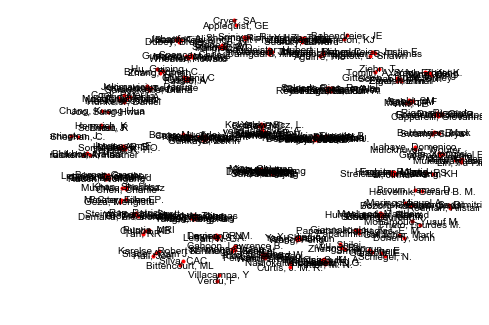

In [97]:
nx.draw_spring(coAuths, with_labels=True, font_size=10, node_size=10)

In [98]:
import community

In [102]:
coAuths = all_chem.networkCoAuthor()  # RC.networkCoAuthor()
print(mk.graphStats(coAuths))

Nodes: 109
Edges: 227
Isolates: 0
Self loops: 0
Density: 0.0385661
Transitivity: 0.973585


In [103]:
partition = community.best_partition(coAuths)
modularity = community.modularity(partition, coAuths)
print('Modularity:', modularity)

Modularity: 0.898545706371191


In [ ]:
nx.draw_spring(coAuths, node_color=[partition[n] for n in acn.nodes()], 
               cmap=plt.cm.Set2, with_labels=True, font_size=10, node_size=30, alpha=0.5)